In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e5/sample_submission.csv
/kaggle/input/playground-series-s3e5/train.csv
/kaggle/input/playground-series-s3e5/test.csv


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics


In [87]:
df_train = pd.read_csv(r'/kaggle/input/playground-series-s3e5/train.csv')
df_test = pd.read_csv(r'/kaggle/input/playground-series-s3e5/test.csv')

In [88]:
df_train.head(2)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.5,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.3,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6


In [89]:
df_test.head(2)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0


In [90]:
df_train['quality'].value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

In [91]:
df_trainCopy = df_train

In [92]:
df_testCopy = df_test

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1372 non-null   int64  
 1   fixed acidity         1372 non-null   float64
 2   volatile acidity      1372 non-null   float64
 3   citric acid           1372 non-null   float64
 4   residual sugar        1372 non-null   float64
 5   chlorides             1372 non-null   float64
 6   free sulfur dioxide   1372 non-null   float64
 7   total sulfur dioxide  1372 non-null   float64
 8   density               1372 non-null   float64
 9   pH                    1372 non-null   float64
 10  sulphates             1372 non-null   float64
 11  alcohol               1372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 128.8 KB


In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [95]:
#combing test and train data to start pre-processing
df = pd.concat([df_train,df_test],axis =0)
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6.0
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6.0
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7.0
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5.0
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 1371
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    3428 non-null   int64  
 1   fixed acidity         3428 non-null   float64
 2   volatile acidity      3428 non-null   float64
 3   citric acid           3428 non-null   float64
 4   residual sugar        3428 non-null   float64
 5   chlorides             3428 non-null   float64
 6   free sulfur dioxide   3428 non-null   float64
 7   total sulfur dioxide  3428 non-null   float64
 8   density               3428 non-null   float64
 9   pH                    3428 non-null   float64
 10  sulphates             3428 non-null   float64
 11  alcohol               3428 non-null   float64
 12  quality               2056 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 374.9 KB


### Checking correlation

<AxesSubplot:>

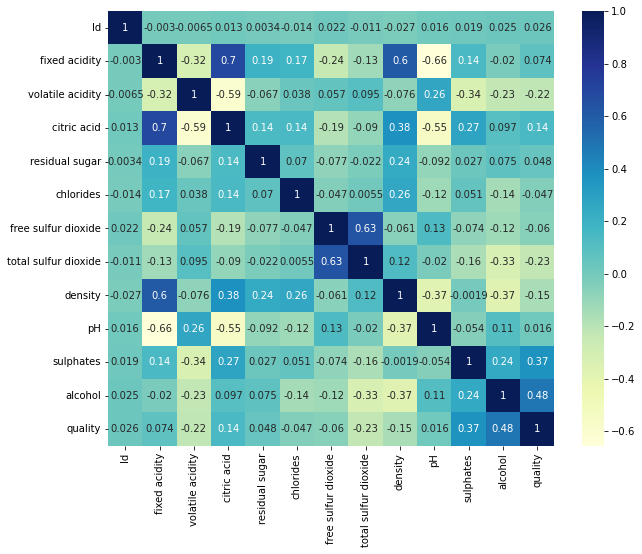

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(),annot = True, cmap = "YlGnBu")

Highly correlated variables with quality are : sulphates and alcohol.

In [98]:
df = df.drop(['quality'],axis =1)

In [99]:
df.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

There are no missing values

In [100]:
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5


In [101]:
#checking skewness in the data
df.skew()

Id                      0.000000
fixed acidity           0.974238
volatile acidity        0.701971
citric acid             0.232507
residual sugar          3.505435
chlorides               5.858161
free sulfur dioxide     0.693383
total sulfur dioxide    1.195734
density                 0.164214
pH                      0.237687
sulphates               1.734961
alcohol                 0.759635
dtype: float64

'residual sugar' & '

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

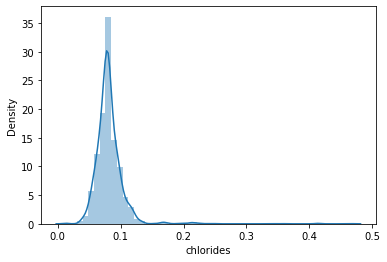

In [102]:
sns.distplot(df['chlorides'])

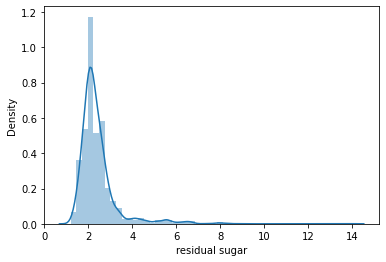

In [103]:
sns.distplot(df['residual sugar'])
plt.show()

Two columns are slightly skewed. Lets go with this only.

In [104]:
# Standarising the training data
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_train_scaled = pd.DataFrame(df_train_scaled,columns = df_train.columns)
df_train_scaled.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.000000,0.275229,0.228571,0.513158,0.078125,0.151741,0.432836,0.113475,0.414831,0.567308,0.243590,0.641509,0.6
1,0.000487,0.394495,0.085714,0.960526,0.085938,0.199005,0.432836,0.212766,0.621880,0.557692,0.179487,0.773585,0.6
2,0.000973,0.192661,0.235714,0.039474,0.070312,0.116915,0.029851,0.017730,0.479442,0.750000,0.217949,0.490566,0.8
3,0.001460,0.284404,0.492857,0.289474,0.109375,0.179104,0.149254,0.205674,0.530837,0.442308,0.089744,0.207547,0.4
4,0.001946,0.321101,0.128571,0.394737,0.085938,0.166667,0.134328,0.134752,0.320852,0.442308,0.621795,0.150943,0.6


In [105]:
df_train_scaled = df_train_scaled.drop(['quality'],axis =1)
df_train_scaled.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.000000,0.275229,0.228571,0.513158,0.078125,0.151741,0.432836,0.113475,0.414831,0.567308,0.243590,0.641509
1,0.000487,0.394495,0.085714,0.960526,0.085938,0.199005,0.432836,0.212766,0.621880,0.557692,0.179487,0.773585
2,0.000973,0.192661,0.235714,0.039474,0.070312,0.116915,0.029851,0.017730,0.479442,0.750000,0.217949,0.490566
3,0.001460,0.284404,0.492857,0.289474,0.109375,0.179104,0.149254,0.205674,0.530837,0.442308,0.089744,0.207547
4,0.001946,0.321101,0.128571,0.394737,0.085938,0.166667,0.134328,0.134752,0.320852,0.442308,0.621795,0.150943


In [106]:
df_train_scaled = df_train_scaled.drop(['Id'],axis = 1) # "ID" not useful in modelling

In [107]:
X = df_train_scaled
y = df_trainCopy['quality']

### Splitting into train-test

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1439, 11), (617, 11), (1439,), (617,))

# Model building

### Random Forest

In [109]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.9029857444040966
r2score_test  0.25430760711410483


# RandomForest model with hyperparameter tuning

In [110]:
from sklearn import model_selection

params = {
         'max_depth' :[2,4,6,8,10],
          'n_estimators':[40,50,60,80,100],
         "max_features": ["auto", "sqrt", "log2"],
          "min_samples_split" : [2,4,8],
         "bootstrap": [True, False]}
rf_gs = model_selection.GridSearchCV(estimator=rf,
                                       param_grid=params,
                                       n_jobs=-1,
                                       cv=4)

rf_gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [40, 50, 60, 80, 100]})

In [111]:
print(rf_gs.best_params_)
print(rf_gs.best_score_)
print(rf_gs.best_estimator_)

{'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 80}
0.3516696941745302
RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_split=4, n_estimators=80)


In [112]:
best_model_rf = rf_gs.best_estimator_
y_train_pred = best_model_rf.predict(X_train)
y_test_pred = best_model_rf.predict(X_test)

print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.7042570249337213
r2score_test  0.28412322765844567


There is huge overfitting in the data. We will have to remove overfitting

### XGBoost

In [113]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)
print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.9894590545591688
r2score_test  0.18450786515376105


# XGBoost hyperparameter tuning

In [114]:
from sklearn import model_selection

params = {'learning_rate' : [0.05,0.08,0.09,0.1],
         'max_depth' :[2,4,6,8,10],
          'n_estimators':[40,50,60,80,100]}
xgbr_gs = model_selection.GridSearchCV(estimator=xgbr,
                                       param_grid=params,
                                       n_jobs=-1,
                                       cv=4)

xgbr_gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_p

In [115]:
print(xgbr_gs.best_params_)
print(xgbr_gs.best_score_)
print(xgbr_gs.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
0.3523273100849298
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [116]:
best_model = xgbr_gs.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.4334671833797238
r2score_test  0.31741545221673806


Here also, we have huge overfitting

# Modelling using Lasso

In [117]:
from sklearn.linear_model import Ridge,Lasso

In [118]:
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,30.0,50.0,100.0,500.0,1000.0]
}
lasso = Lasso()
lasso_model_CV = GridSearchCV(estimator=lasso,param_grid=params,scoring = 'neg_mean_absolute_error',cv = 5,return_train_score=True)
lasso_model_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [119]:
cv_results =  pd.DataFrame(lasso_model_CV.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006258,0.001038,0.001906,0.000077,0.0001,{'alpha': 0.0001},-0.558804,-0.579445,-0.500663,-0.556642,...,-0.543918,0.027971,1,-0.535618,-0.525276,-0.547161,-0.536399,-0.540498,-0.536990,0.007144
1,0.009727,0.004652,0.002089,0.000205,0.001,{'alpha': 0.001},-0.558514,-0.579954,-0.504085,-0.558399,...,-0.545009,0.027185,2,-0.539511,-0.528456,-0.549884,-0.539595,-0.543617,-0.540213,0.006989
2,0.006872,0.000613,0.002136,0.000333,0.01,{'alpha': 0.01},-0.581428,-0.601779,-0.526725,-0.591954,...,-0.570597,0.027751,3,-0.567070,-0.557578,-0.577346,-0.564848,-0.572654,-0.567899,0.006758
3,0.006298,0.000639,0.002595,0.000945,0.05,{'alpha': 0.05},-0.664419,-0.671411,-0.598279,-0.647650,...,-0.642701,0.026130,4,-0.642216,-0.631876,-0.651857,-0.634005,-0.647770,-0.641545,0.007693
4,0.006593,0.000208,0.003437,0.001536,0.1,{'alpha': 0.1},-0.743393,-0.739653,-0.676546,-0.705642,...,-0.715180,0.024490,5,-0.706797,-0.707977,-0.725104,-0.718431,-0.715920,-0.714846,0.006800


In [120]:
lasso_model_CV.best_params_

{'alpha': 0.0001}

In [121]:
lasso_model_CV.best_score_

-0.5439181107125277

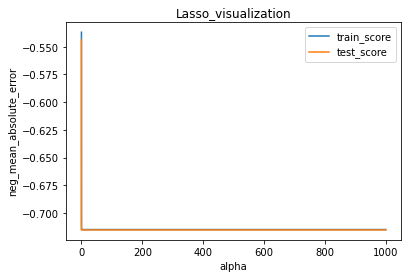

In [122]:
# plotting mean_test and tarin_scores for lasso regression
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title('Lasso_visualization')
plt.legend(['train_score','test_score'], loc = 'best')
plt.show();

In [123]:
# Final lasso model
alpha = 0.0001 # we get best alpha value as 0.0001
lasso = Lasso(alpha = alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

### Modelling using Ridge

In [124]:
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,30.0,50.0,100.0,500.0,1000.0]
}
ridge = Ridge()
ridge_model_CV = GridSearchCV(estimator=ridge,param_grid=params,scoring = 'neg_mean_absolute_error',cv = 5,return_train_score=True)
ridge_model_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [125]:
cv_results =  pd.DataFrame(ridge_model_CV.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006942,0.001337,0.002749,0.000906,0.0001,{'alpha': 0.0001},-0.558910,-0.579442,-0.500394,-0.556555,...,-0.543936,0.028009,1,-0.535235,-0.524991,-0.546875,-0.536128,-0.540133,-0.536673,0.007140
1,0.004107,0.002005,0.002110,0.000703,0.001,{'alpha': 0.001},-0.558912,-0.579444,-0.500396,-0.556559,...,-0.543938,0.028009,2,-0.535238,-0.524994,-0.546878,-0.536131,-0.540136,-0.536675,0.007140
2,0.002458,0.000098,0.001548,0.000113,0.01,{'alpha': 0.01},-0.558930,-0.579460,-0.500419,-0.556594,...,-0.543960,0.028009,3,-0.535267,-0.525021,-0.546906,-0.536156,-0.540165,-0.536703,0.007140
3,0.002685,0.000340,0.001845,0.000467,0.05,{'alpha': 0.05},-0.559013,-0.579531,-0.500518,-0.556750,...,-0.544056,0.028009,4,-0.535396,-0.525141,-0.547029,-0.536265,-0.540298,-0.536826,0.007142
4,0.002856,0.000439,0.001815,0.000351,0.1,{'alpha': 0.1},-0.559117,-0.579631,-0.500641,-0.556943,...,-0.544177,0.028013,5,-0.535558,-0.525291,-0.547184,-0.536402,-0.540464,-0.536980,0.007145


In [126]:
# Best ridge model parameter
ridge_model_CV.best_params_

{'alpha': 0.0001}

In [127]:
# Best ridge model score
ridge_model_CV.best_score_

-0.5439362876118647

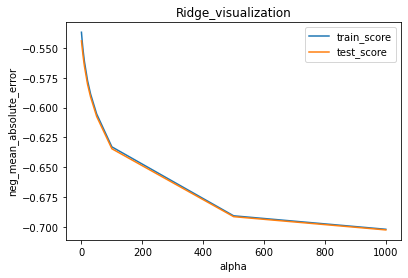

In [128]:
# plotting mean_test and tarin_scores for Ridge regression
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title('Ridge_visualization')
plt.legend(['train_score','test_score'], loc = 'best')
plt.show();

In [129]:
# Final Ridge model
alpha = 50.0 # we get best alpha value as 50.0
ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=50.0)

### Observing variables with ceffiecients of both Ridge & Lasso regression

In [130]:
betas = pd.DataFrame(index = X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows',None)
betas.sort_values(['Ridge','Lasso'],ascending = False) # sorting coeffiensts

,Ridge,Lasso
alcohol,1.022908,1.758090
sulphates,0.503719,2.210018
citric acid,0.233109,0.078361
fixed acidity,0.091339,0.243391
pH,0.057665,0.037215
residual sugar,0.010577,-0.098546
chlorides,-0.020544,-0.000000
free sulfur dioxide,-0.039574,0.221488
density,-0.206845,-0.195162
volatile acidity,-0.276631,-0.349376


## Observation : 
Ridge and Lasso both are giving most impotance to two variables 'alcohol' and 'sulphates'. This was also revealed while checking with correlation.

In [131]:
# Calculating prediction of both lasso and Ridge model


In [132]:
#Lasso results
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.32545854575724964
r2score_test  0.25999826673506155


In [133]:
#Ridge results
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.24519155874929333
r2score_test  0.2027450739465233


# Test

In [134]:
df_test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [135]:
test = df_test.drop(['Id'],axis =1)
test.shape

(1372, 11)

In [136]:
# Standarising the training data

test_scaled = scaler.fit_transform(test)
test_scaled = pd.DataFrame(test_scaled,columns = test.columns)
test_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.214953,0.322314,0.013158,0.100000,0.142857,0.447761,0.292994,0.564356,0.511811,0.162602,0.192308
1,0.214953,0.524793,0.197368,0.100000,0.197802,0.194030,0.171975,0.440975,0.464567,0.235772,0.230769
2,0.327103,0.280992,0.526316,0.100000,0.116484,0.298507,0.267516,0.584158,0.267717,0.211382,0.134615
3,0.289720,0.289256,0.526316,0.071429,0.096703,0.194030,0.108280,0.360244,0.440945,0.211382,0.557692
4,0.149533,0.181818,0.421053,0.114286,0.070330,0.104478,0.547771,0.265804,0.385827,0.073171,0.769231


# Final observation : Based on score of all models above, XGBosst with hyperparameter tuning is giving highest score.We will go with this model finally.

In [137]:
y_pred_test =best_model.predict(test_scaled)

In [138]:
y_pred_test

array([5.358643 , 5.988782 , 5.3487206, ..., 5.33931  , 5.1686087,
       5.6675396], dtype=float32)

In [139]:

y_pred_test = np.asarray(y_pred_test,dtype = 'int')

# Submission data

In [140]:
df_testCopy.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [141]:
submission = pd.DataFrame(
    {'Id':df_test["Id"] ,
     'quality': y_pred_test.round(0)},columns=['Id', 'quality'])

In [142]:
submission.to_csv("submission.csv", index=False)

In [143]:
submission.head()

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,6
4,2060,5
